Итерируемые объекты

В языке Python под итерируемым объектом подразумевают объект, который можно итерировать, то есть проходиться по нему, перебирая каждый элемент раз за разом. К примеру, уже известные нам списки (тип list), строки (тип str), кортежи (тип tuple), множества (тип set), словари (тип dict) являются итерируемыми, поскольку мы можем перебирать каждый элемент этих объектов.

In [1]:
numbers = [1, 2, 3]
name = 'python'

for num in numbers:  # итерируем по списку, перебирая каждый элемент
    print(num)

for c in name:  # итерируем по строке, перебирая каждый символ
    print(c)

print(2 in numbers)  # неявное итерирование по списку
print('A' in name)  # неявное итерирование по строке
print(*numbers)  # неявное итерирование по списку при распаковке

1
2
3
p
y
t
h
o
n
True
False
1 2 3


Если подходить более формально в Python, существует два типа итерируемых объектов:

итераторы
коллекции и последовательности

Итераторы

Итератор — специальный объект, который выдает свои элементы по одному за раз.

Если итератор передать во встроенную функцию next(), то эта функция вернет его следующий элемент. При этом сам итератор также сдвинется на следующий элемент. При следующем вызове функция next() вернет следующий элемент и т.д. Если же в итераторе элементов больше не осталось, то вызов функции next() приведет к возникновению исключения StopIteration

In [2]:
numbers = iter([1, 2, 3])  # Создаем итератор из списка

print(next(numbers))  # Выведет: 1
print(next(numbers))  # Выведет: 2
print(next(numbers))  # Выведет: 3

print(next(numbers))  # Приведет к исключению StopIteration

1
2
3


StopIteration: 

Коллекции и последовательности

Коллекция — объект, хранящий набор значений одного или различных типов, позволяющий обращаться к этим значениям, а также применять специальные функции и методы, зависящие от типа коллекции.

Также среди коллекций можно выделить те, элементы которых пронумерованы индексами и расположены в строгом порядке. Такие коллекции называются последовательностями. Например, списки, строки и кортежи являются последовательностями, а множества и словари нет.

Коллекции не являются итераторами сами по себе, но позволяют создать итератор на своей основе.

Для того чтобы создать итератор на основе некоторой коллекции, достаточно вызвать встроенную функцию iter(), передав нужную коллекцию в качестве ее аргумента.

Например, список не является итератором, но на его основе можно создать сколько угодно итераторов, каждый из которых будет перебирать элементы списка от первого до последнего.

Большинство функций, которые работают с итераторами, работают также и с коллекциями.

In [3]:
numbers = [1, 2, 3]

iterator = iter(numbers)  # создаем итератор на основании списка

print(next(iterator))  # запрашиваем и печатаем первый элемент итератора
print(next(iterator))  # запрашиваем и печатаем второй элемент итератора
print(next(iterator))  # запрашиваем и печатаем третий элемент итератора

1
2
3


Получить итератор можно из любого итерируемого объекта, для этого нужно передать итерируемый объект во встроенную функцию iter()

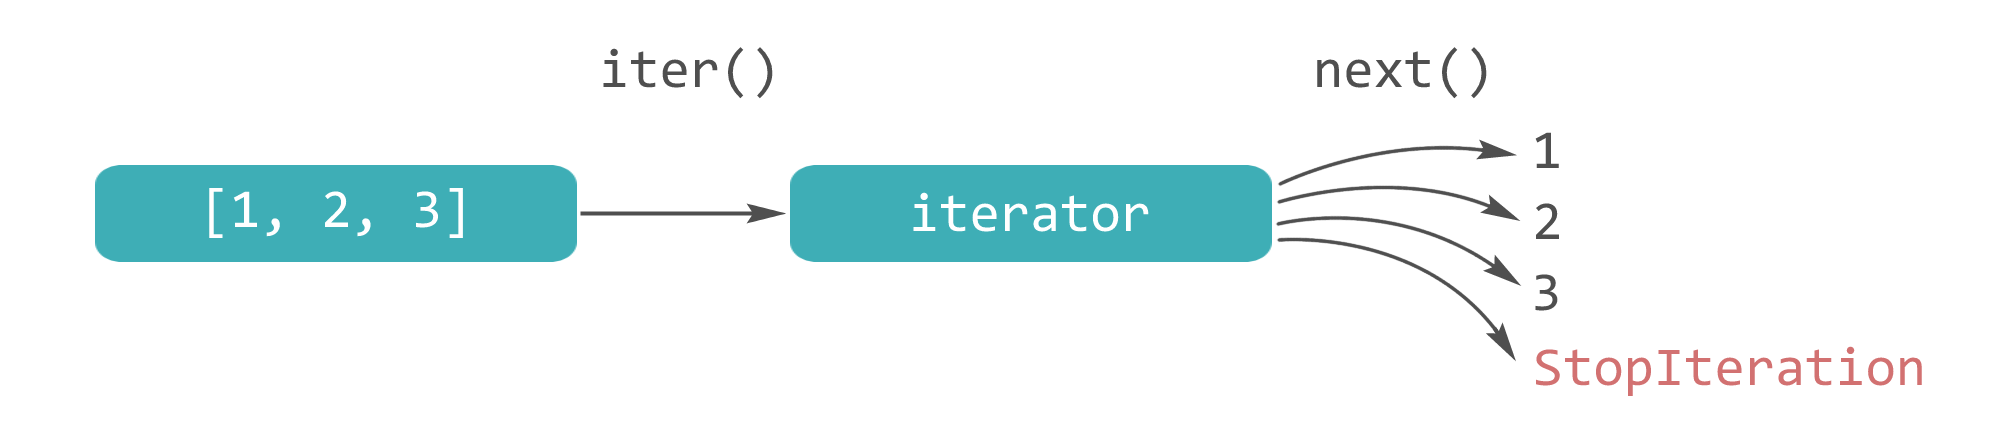

In [4]:
from functions import picture

picture('сарпвепкагавп.png')

После того как мы получили итератор, мы можем передать его встроенной функции next(). При каждом новом вызове, функция next() возвращает очередной элемент итератора. Если же в итераторе элементов больше не осталось, то функция next() возбуждает исключение StopIteration

In [5]:
numbers = [1, 2, 3]

iterator = iter(numbers)  # создаем итератор на основе списка

print(next(iterator))  # запрашиваем и печатаем первый элемент итератора
print(next(iterator))  # запрашиваем и печатаем второй элемент итератора
print(next(iterator))  # запрашиваем и печатаем третий элемент итератора

print(next(iterator))  # возбуждается исключение StopIteration

1
2
3


StopIteration: 

Единственное, что мы можем сделать с итератором, — передать его функции next(). Как только итератор становится пустым и порождается исключение StopIteration, он становится совершенно бесполезным.

Основная разница между последовательностями и итераторами, заключается в том, что в последовательностях элементы пронумерованы индексами, начиная от нуля. Мы можем обратиться к конкретному элементу таких объектов по индексу. В итераторах мы можем лишь последовательно запрашивать следующий элемент.

In [6]:
numbers = [1, 2, 3, 4]  # список
letters = ('a', 'b', 'c')  # кортеж
language = 'python'  # строка

print(numbers[3])  # обращение по индексу
print(letters[2])  # обращение по индексу
print(language[5])  # обращение по индексу

4
c
n


In [7]:
letters = ('a', 'b', 'c')

iterator = iter(letters)  # создаем итератор на основе кортежа

print(iterator[1])  # обращение по индексу

TypeError: 'tuple_iterator' object is not subscriptable

Преимущества итераторов

Основными преимуществами использования итераторов являются:

однотипность работы с объектами разных типов
ленивые вычисления и экономия потребляемой памяти
комбинация множества итераторов для создания понятной и читабельной программы

Однотипность работы с объектами разных типов

Итераторы позволяют разным объектам притворяться одинаковыми. Списки, кортежи, строки, множества, словари, объекты типа range имеют разные типы, но мы можем использовать любой из этих объектов:

в цикле for
в функциях высшего порядка map(), filter(), reduce(), reversed() и т.д.
для проверки наличия некоторого значения с помощью оператора принадлежности in
для распаковки элементов с помощью * и т.д.

Цикл for в Python работает по следующему принципу:

создает итератор на основе итерируемого объекта
запрашивает очередной элемент из итератора с помощью функции next() и передает его в выполняемый блок кода (тело цикла)
останавливается при получении исключения StopIteration

Благодаря этому, в цикл for можно передать и список, и кортеж, и строку, и объект типа range, и многие другие объекты, которые имеют свои итераторы.

По сути, приведенный ниже код:

In [ ]:
numbers = [1, 2, 3, 4]

for num in numbers:
    print(num)

за кулисами превращается в:

In [ ]:
numbers = [1, 2, 3, 4]

iterator = iter(numbers)  # создается итератор

while True:
    try:
        item = next(iterator)
        print(item)
    except StopIteration:
        break

Ленивые вычисления и экономия потребляемой памяти

Ленивые вычисления предполагают, что не нужно ничего делать до тех пор, пока в этом нет необходимости. Это не просто удобно, но и позволяет экономить память и время на вычисление.

In [8]:
numbers = range(5)  # 5 чисел в последовательности

for num in numbers:
    print(num)

0
1
2
3
4


Объекты типа range являются итерируемыми объектами. Цикл for создает на основе объекта range итератор, у которого запрашивает элементы по одному, пока не будет достигнут конец последовательности чисел. В нашем примере, пока не будет получено число 4.

Важно понимать, что объект типа range не хранит весь набор чисел. Он создает новое число (на лету) только тогда, когда оно потребуется, при этом старые значения не хранятся. Размер объектов range не зависит от количества чисел, которые предполагается перебрать, ведь нужно помнить только начальное и конечное значения последовательности, шаг и текущее значение.

In [9]:
from sys import getsizeof

numbers1 = range(5)  # 5 чисел в последовательности
numbers2 = range(100000)  # 100000 чисел в последовательности
numbers3 = range(10000000000000)  # 10000000000000 чисел в последовательности

print(getsizeof(numbers1))
print(getsizeof(numbers2))
print(getsizeof(numbers3))

48
48
48


Все объекты range имеют один и тот же размер в памяти — 48 байт. Такой подход позволяет создавать "большие" итераторы (даже бесконечные), не занимая много памяти.

Заметим, что мы можем преобразовать любой итерируемый объект в список. Однако при таком преобразовании все элементы итерируемого объекта будут записаны в память.

In [13]:
from sys import getsizeof

numbers1 = list(range(5))  # 5 чисел в списке
numbers2 = list(range(100000))  # 100000 чисел в списке

print(getsizeof(numbers1))
print(getsizeof(numbers2))

104
800056


Чем больше элементов в списке, тем больше памяти он занимает. Преобразование итерируемого объекта в список не всегда будет заканчиваться удачно.

In [17]:
from sys import getsizeof

numbers3 = list(range(10000000000000))  # 10000000000000 чисел в списке

print(getsizeof(numbers3))

MemoryError: 

приводит в возникновению исключения MemoryError. Python не позволяет нам создать такой большой список 😔.

Объекты типа range являются ленивыми, преобразовывать их в списки стоит с особенной аккуратностью и только тогда, когда это действительно необходимо.

Комбинация множества итераторов

У итераторов есть замечательная особенность: их можно комбинировать. Это позволяет вместо огромных циклов с перемешанными этапами обработки писать небольшие блоки, которые стыкуются друг с другом.

In [18]:
sentence = 'In the face of ambiguity refuse the temptation to guess'

filter_iterator = filter(lambda word: len(word) > 4, sentence.split())  # фильтруем
map_iterator = map(lambda word: word.upper(), filter_iterator)  # преобразовываем
enumerate_iterator = enumerate(map_iterator, 1)  # нумеруем

for index, value in enumerate_iterator:  # выводим
    print(f'{index}. {value}')

1. AMBIGUITY
2. REFUSE
3. TEMPTATION
4. GUESS


Обратите внимание на то, что все три объекта filter_iterator, map_iterator, enumerate_iterator являются итераторами. Они не хранят все данные в памяти, а создают и выдают их по мере того, как их запрашивают. Другими словами, при обращении к очередному элементу enumerate_iterator произойдет последовательное обращение сначала к элементу map_iterator, а затем к элементу filter_iterator

Имейте в виду, что от порядка, в котором комбинируются итераторы, зависит итоговый результат.

Примечания

Примечание 1. Встроенной функции next() можно передать второй аргумент, который будет возвращен вместо возбуждения исключения StopIteration, если в итераторе больше не осталось элементов.

In [22]:
nums = iter([1, 2, 3, 4])

print(next(nums, -1))
print(next(nums))
print(next(nums))
print(next(nums, -1))
print(next(nums, -1))
print(next(nums, -1))

1
2
3
4
-1
-1


Примечание 2. Не забывайте, что коллекции не являются итераторами. Поэтому встроенная функция next() не позволяет получить очередной элемент, например списка, строки и т.д.

In [23]:
nums = [1, 2, 3, 4]

print(next(nums))

TypeError: 'list' object is not an iterator

Но на основе коллекции можно создать итератор.

In [26]:
nums = [1, 2, 3, 4]
nums_iterator = iter(nums)  # создаем итератор

print(type(nums))
print(type(nums_iterator))
print(next(nums_iterator))
print(next(nums_iterator))
print(next(nums_iterator, 0))
print(next(nums_iterator, 0))
print(next(nums_iterator, 0))

<class 'list'>
<class 'list_iterator'>
1
2
3
4
0


Примечание 3. Итераторы могут генерировать бесконечное число значений, не занимая много дополнительной памяти. Например, итератор может генерировать все натуральные числа или все простые числа. Или генерировать значения, количество которых заранее неизвестно.

Встроенная функция len() не работает с большей частью итерируемых объектов, потому что их длина может быть очень большой или даже бесконечной.

In [27]:
numbers = [1, 2, 3, 4, 5, 6]

evens = filter(lambda num: num % 2 == 0, numbers)
print(len(evens))

TypeError: object of type 'filter' has no len()

В случае с итерируемыми объектами, которые являются итераторами, посчитать длину можно только если полностью пройти итератор от начала до конца, что может быть очень долго. Для итераторов, про которые заранее неизвестно, бесконечные они или нет, функция len() могла бы работать не просто долго, а вечно. Именно поэтому функция len() не применима к итераторам.

Примечание 4. Для некоторых итерируемых объектов длину можно посчитать мгновенно, не перебирая элементы. К таким объектам можно отнести числовые последовательности range.

In [28]:
numbers1 = range(5)  # 5 чисел в последовательности
numbers2 = range(100000)  # 100000 чисел в последовательности
numbers3 = range(10000000000000)  # 10000000000000 чисел в последовательности

print(len(numbers1))
print(len(numbers2))
print(len(numbers3))

5
100000
10000000000000


Примечание 6. Обратите внимание на то, что на основе одного списка (кортежа, строки, множества, словаря и т.д.) мы можем создавать множество несвязанных между собой итераторов. Каждый из них будет независимо от других перемещаться от начала до конца.

In [29]:
numbers = list(range(1, 10))

iterator1 = iter(numbers)
iterator2 = iter(numbers)
iterator3 = iter(numbers)

print(numbers)

print(next(iterator1))
print(next(iterator1))

print(next(iterator2))

print(next(iterator3))
print(next(iterator3))
print(next(iterator3))
print(next(iterator3))
print(next(iterator3))

[1, 2, 3, 4, 5, 6, 7, 8, 9]
1
2
1
1
2
3
4
5


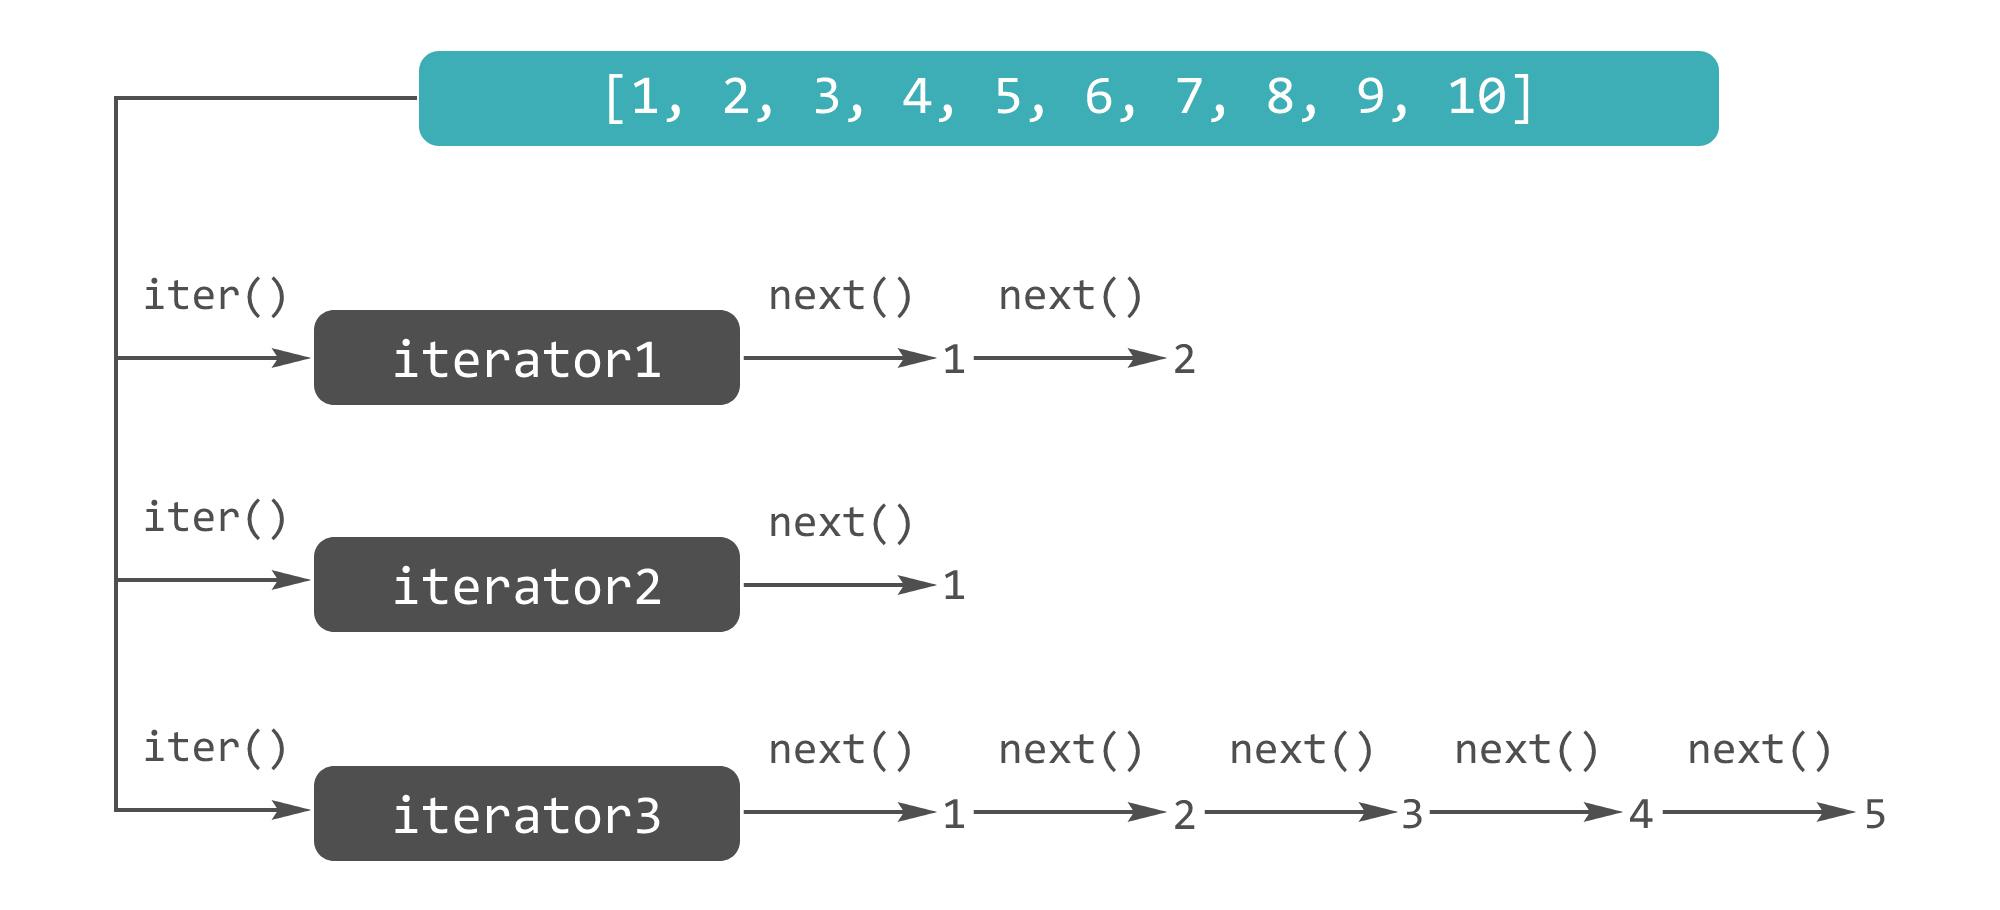

In [30]:
picture('Новый проект (10).png')

Примечание 7. Важно понимать разницу между итерируемыми объектами и итераторами:

iterable (итерируемый) — это свойство того, по кому будет происходить итерирование
iterator (итерирующий) — это тот, кто ходит
Другими словами, iterable — сущность, по которой ходим, книга, которую листаем, а iterator — листающая сущность, палец, который указывает на нужный лист в книге.

Примечание 8. Классифицировать контейнерный тип данных в Python, то есть определить, является ли он, например, последовательностью, можно проверкой наличия соответствующих методов.

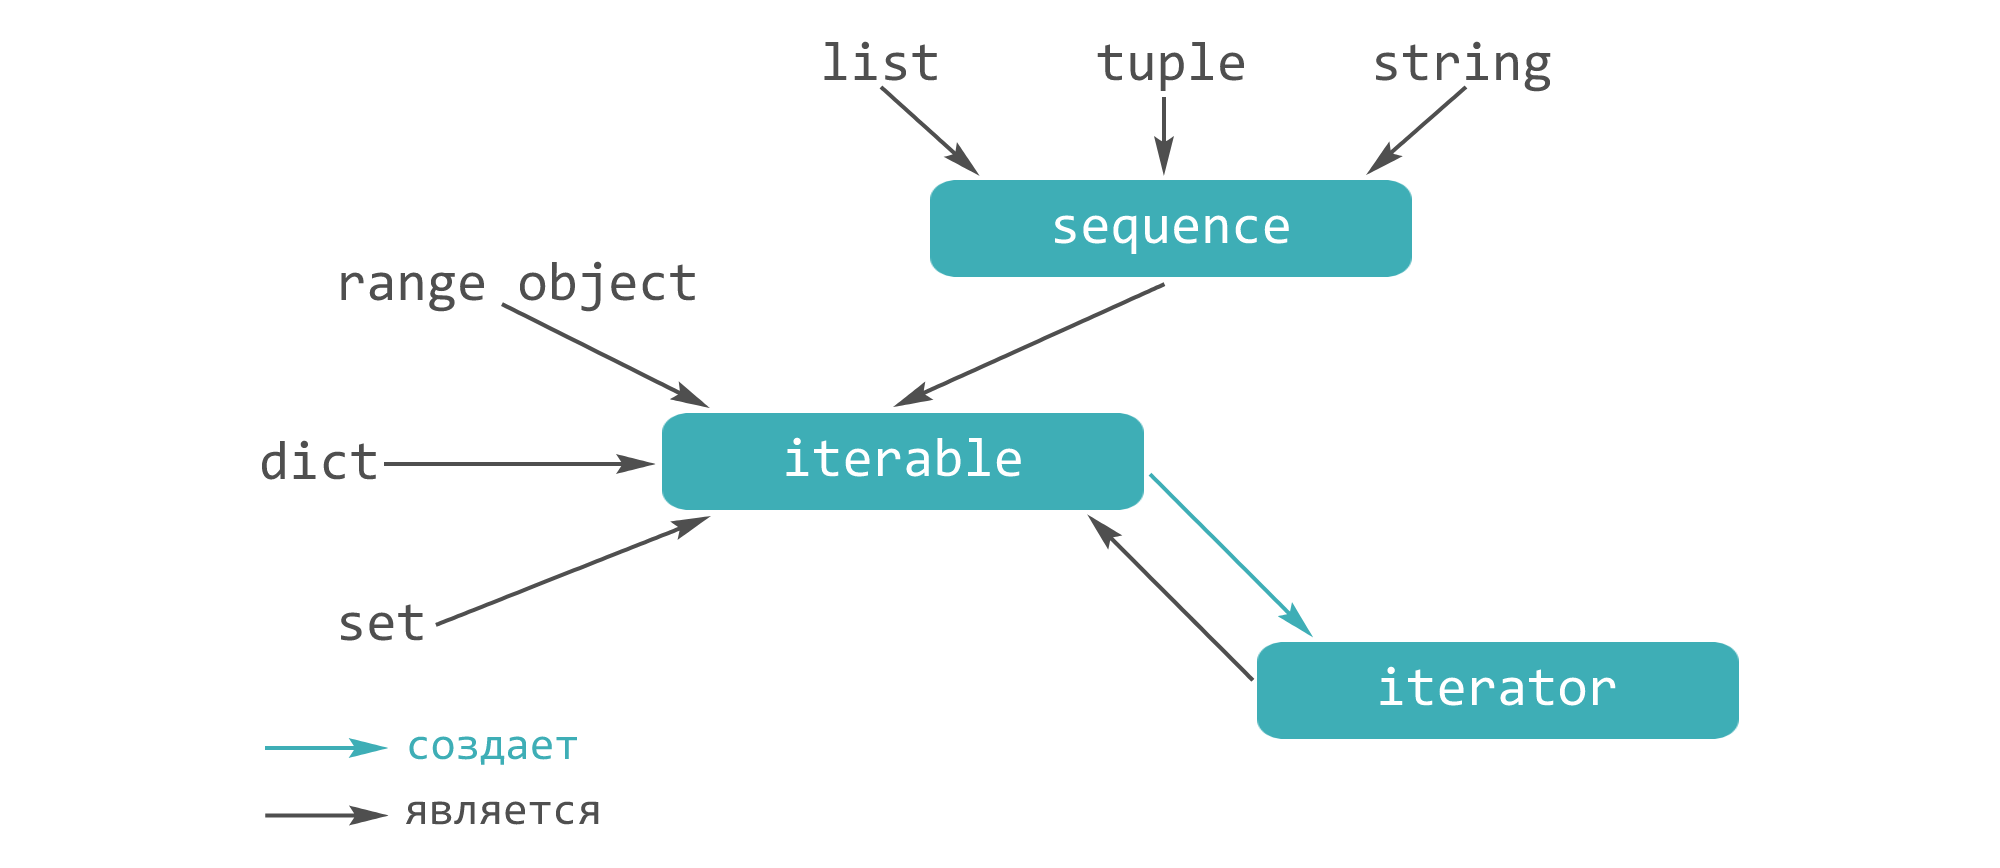

In [31]:
picture('Новый проект (11).png')

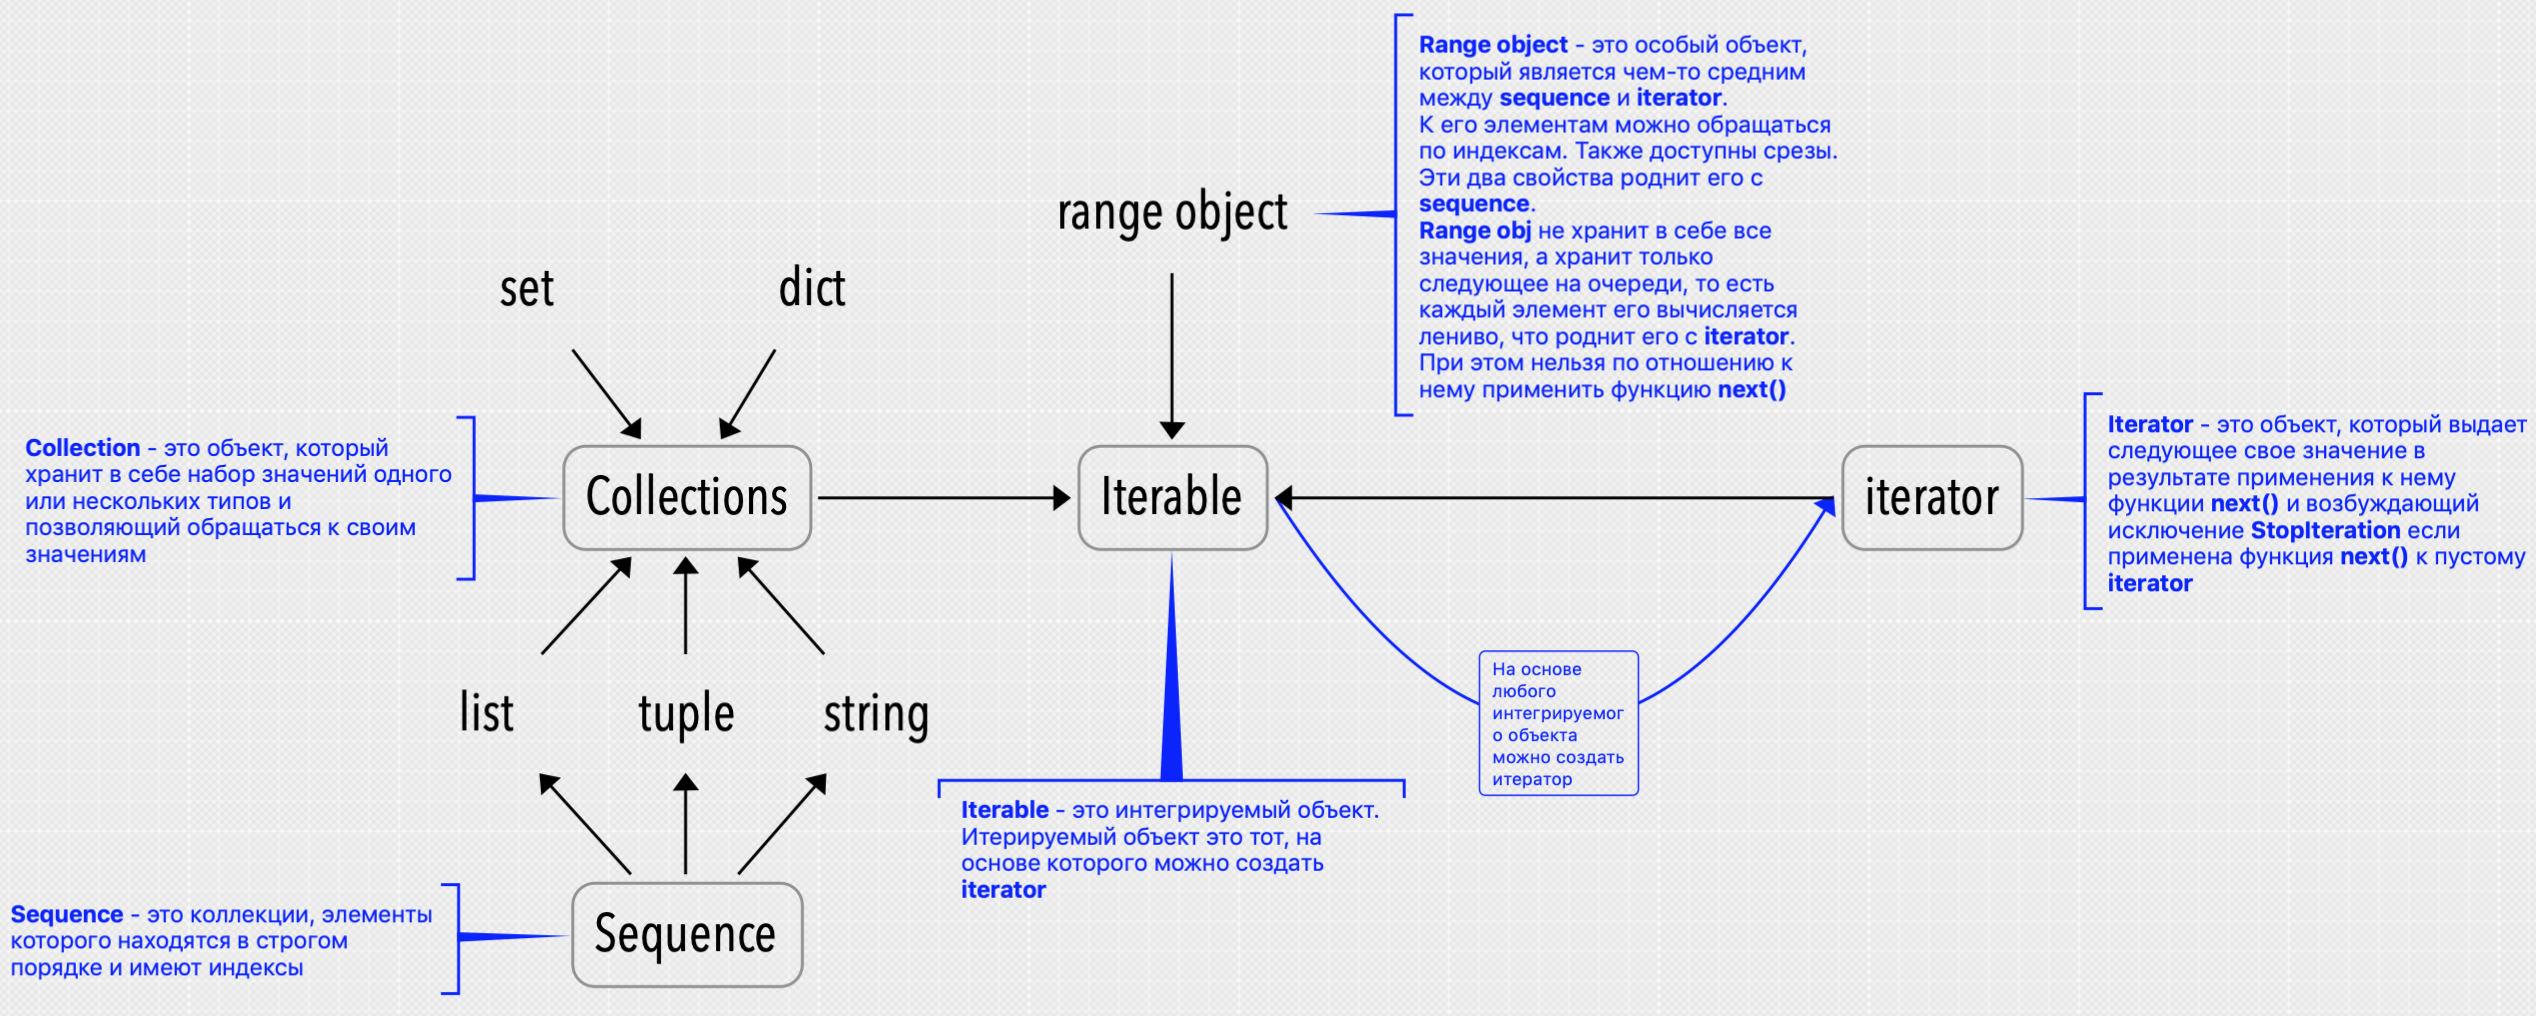

In [32]:
picture('Снимок экрана 2022-10-09 в 13.07.38.png')

In [36]:
def check_iter(object, depth=0):
    if hasattr(object, '__iter__'):
        if hasattr(object, '__next__'):
            print(f'Объект \033[92m{object}\033[0m {type(object)} '
                  f'\033[92mитерируемый\033[0m (итератор)')
        else:
            print(f'Объект \033[92m{object}\033[0m {type(object)} '
                  f'\033[92mитерируемый\033[0m')
            if depth > 0:
                [check_iter(obj, depth - 1) for obj in object]
    else:
        print(f'Объект \033[91m{object}\033[0m {type(object)} '
              f'\033[91mне итерируемый\033[0m')


# Пример использования
objects = [
    enumerate('beegeek'),
    [1, 2, 3, 4, 5],
    'beegeek',
    range(10),
    map(str.upper, 'beegeek'),
    (1, 2, 3, 4, 5),
    filter(None, '11010111'),
    {'bee': 1, 'geek': 2},
    {1, 2, 3, 4, 5},
    zip('bee', 'geek')
]

check_iter(objects, depth=1)
# check_iter(42)
# check_iter(True)
# check_iter('Hello!')
# check_iter([1, 2, 3, (4, 5, 6)], depth=2)

Объект [<enumerate object at 0x0000021786C81C10>, [1, 2, 3, 4, 5], 'beegeek', range(0, 10), <map object at 0x00000217866BCB50>, (1, 2, 3, 4, 5), <filter object at 0x00000217866BFE50>, {'bee': 1, 'geek': 2}, {1, 2, 3, 4, 5}, <zip object at 0x0000021786F06DC0>] <class 'list'> итерируемый
Объект <enumerate object at 0x0000021786C81C10> <class 'enumerate'> итерируемый (итератор)
Объект [1, 2, 3, 4, 5] <class 'list'> итерируемый
Объект beegeek <class 'str'> итерируемый
Объект range(0, 10) <class 'range'> итерируемый
Объект <map object at 0x00000217866BCB50> <class 'map'> итерируемый (итератор)
Объект (1, 2, 3, 4, 5) <class 'tuple'> итерируемый
Объект <filter object at 0x00000217866BFE50> <class 'filter'> итерируемый (итератор)
Объект {'bee': 1, 'geek': 2} <class 'dict'> итерируемый
Объект {1, 2, 3, 4, 5} <class 'set'> итерируемый
Объект <zip object at 0x0000021786F06DC0> <class 'zip'> итерируемый (итератор)


Для большей наглядности выводимой информации иногда использую. Устанавливаем цвет - \033[92mЦветной текст\033[0m - сбрасываем настройки цвета текста.

\033[92 например зеленый, а \033[91m красный

In [47]:
print("\033[91mЭто красный текст\033[0m")
print("\033[92mЭто зелёный текст\033[0m")
print("\033[93mЭто жёлтый текст\033[0m")
print("\033[94mЭто синий текст\033[0m")
print("\033[95mЭто фиолетовый текст\033[0m")
print("\033[96mЭто цвет морской волны\033[0m")
print("\033[97mЭто белый текст\033[0m")

Это красный текст
Это зелёный текст
Это жёлтый текст
Это синий текст
Это фиолетовый текст
Это цвет морской волны
Это белый текст


In [48]:
print("\033[30mЧёрный\033[0m")
print("\033[31mКрасный\033[0m")
print("\033[32mЗелёный\033[0m")
print("\033[33mЖёлтый\033[0m")
print("\033[34mСиний\033[0m")
print("\033[35mФиолетовый\033[0m")
print("\033[36mБирюзовый\033[0m")
print("\033[37mБелый\033[0m")

print("\033[90mТёмно-серый\033[0m")
print("\033[91mЯрко-красный\033[0m")
print("\033[92mЯрко-зелёный\033[0m")
print("\033[93mЯрко-жёлтый\033[0m")
print("\033[94mЯрко-синий\033[0m")
print("\033[95mЯрко-фиолетовый\033[0m")
print("\033[96mЯрко-бирюзовый\033[0m")
print("\033[97mЯрко-белый\033[0m")

print("\033[40m\033[37mФон чёрный\033[0m")
print("\033[41m\033[30mФон красный\033[0m")
print("\033[42m\033[30mФон зелёный\033[0m")
print("\033[43m\033[30mФон жёлтый\033[0m")
print("\033[44m\033[30mФон синий\033[0m")
print("\033[45m\033[30mФон фиолетовый\033[0m")
print("\033[46m\033[30mФон бирюзовый\033[0m")
print("\033[47m\033[30mФон белый\033[0m")

Чёрный
Красный
Зелёный
Жёлтый
Синий
Фиолетовый
Бирюзовый
Белый
Тёмно-серый
Ярко-красный
Ярко-зелёный
Ярко-жёлтый
Ярко-синий
Ярко-фиолетовый
Ярко-бирюзовый
Ярко-белый
Фон чёрный
Фон красный
Фон зелёный
Фон жёлтый
Фон синий
Фон фиолетовый
Фон бирюзовый
Фон белый


In [50]:
def check_iterator(obj, depth=0):
    """Проверяет, является ли объект итератором"""
    if hasattr(obj, '__iter__'):
        if hasattr(obj, '__next__'):
            print(f'Объект \033[92m{obj}\033[0m {type(obj)} '
                  f'\033[92mявляется итератором\033[0m ✅')
        else:
            print(f'Объект \033[93m{obj}\033[0m {type(obj)} '
                  f'\033[93mне является итератором, но итерируемый\033[0m ⚠')
            if depth > 0 and isinstance(obj, (list, tuple, set, dict, range, str)):
                for item in obj:
                    check_iterator(item, depth - 1)
    else:
        print(f'Объект \033[91m{obj}\033[0m {type(obj)} '
              f'\033[91mне является итератором и не итерируемый\033[0m ❌')


# Список объектов для проверки
objects = [
    enumerate('beegeek'),           # Итератор
    [1, 2, 3, 4, 5],                # Список (итерируемый, но не итератор)
    'beegeek',                      # Строка (итерируемая, но не итератор)
    range(10),                      # range (итерируемый, но не итератор)
    map(str.upper, 'beegeek'),      # Итератор
    (1, 2, 3, 4, 5),                # Кортеж (итерируемый, но не итератор)
    filter(None, '11010111'),       # Итератор
    {'bee': 1, 'geek': 2},          # Словарь (итерируемый, но не итератор)
    {1, 2, 3, 4, 5},                # Множество (итерируемое, но не итератор)
    zip('bee', 'geek')              # Итератор
]

# Проверяем каждый объект
print("\033[1m🔍 Проверка объектов на итератор:\033[0m\n")
for obj in objects:
    check_iterator(obj)


🔍 Проверка объектов на итератор:

Объект <enumerate object at 0x0000021786F17420> <class 'enumerate'> является итератором ✅
Объект [1, 2, 3, 4, 5] <class 'list'> не является итератором, но итерируемый ⚠
Объект beegeek <class 'str'> не является итератором, но итерируемый ⚠
Объект range(0, 10) <class 'range'> не является итератором, но итерируемый ⚠
Объект <map object at 0x00000217866BCAC0> <class 'map'> является итератором ✅
Объект (1, 2, 3, 4, 5) <class 'tuple'> не является итератором, но итерируемый ⚠
Объект <filter object at 0x00000217866B45B0> <class 'filter'> является итератором ✅
Объект {'bee': 1, 'geek': 2} <class 'dict'> не является итератором, но итерируемый ⚠
Объект {1, 2, 3, 4, 5} <class 'set'> не является итератором, но итерируемый ⚠
Объект <zip object at 0x0000021786C9B8C0> <class 'zip'> является итератором ✅


In [51]:
numbers = filter(None, [0, 1, 2, 3])

next(numbers)
next(numbers)
next(numbers)

try:
    print(next(numbers))
except StopIteration:
    print('Error')

Error


filter(function, iterable) создаёт итерируемый объект (итератор), который лениво фильтрует элементы.

Вам доступен список numbers, содержащий целые числа. Дополните приведенный ниже код с использованием функций iter() и next(), чтобы он вывел четвертый элемент данного списка.

In [55]:
numbers = [100, 70, 34, 45, 30, 83, 12, 83, -28, 49, -8, -2, 6, 62, 64, -22, -19, 61, 13, 5, 80, -17, 7, 3, 21, 73, 88, -11, 16, -22]

numbers = iter(numbers)

# for _ in '1234':
#     print(next(numbers))
l = [next(numbers) for _ in '1234']
print(l[-1])

45


Вам доступен список numbers, содержащий целые числа. Дополните приведенный ниже код с использованием функций iter() и next(), чтобы он вывел последний элемент данного списка.

In [67]:
numbers = [100, 70, 34, 45, 30, 83, 12, 83, -28, 49, -8, -2, 6, 62, 64, -22, -19, 61, 13, 5, 80, -17, 7, 3, 21, 73, 88, -11, 16, -22]

it = iter(numbers)
l = [next(it) for _ in iter(it)]
print(l[-1])

-22


In [ ]:
numbers = [100, 70, 34, 45, 30, 83, 12, 83, -28, 49, -8, -2, 6, 62, 64, -22, -19, 61, 13, 5, 80, -17, 7, 3, 21, 73, 88, -11, 16, -22]

iterator = iter(numbers)
*_, last = iterator

print(last)